<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio EDA y Gestión de Nulos

AutoRenew, una empresa líder en la venta de coches de segunda mano, te ha contratado para desarrollar un modelo predictivo que estime el precio de los vehículos usados. Este modelo ayudará a la empresa a mejorar sus estrategias de ventas, marketing y optimización del inventario. Para ello, cuentas con un conjunto de datos que contiene información detallada sobre diversas características de los coches usados. Sin embargo, como es común en conjuntos de datos reales, encontrarás valores nulos y necesitarás realizar un análisis exploratorio para identificar patrones, correlaciones y posibles anomalías.

 En este laboratorio, tu tarea es realizar un análisis exploratorio de los datos (EDA) y gestionar los valores nulos que encuentres. Este es solo el primer paso de un proyecto que se desarrollará durante toda la semana, en el que usarás este mismo conjunto de datos para practicar diferentes fases del preprocesamiento.

**Columnas del conjunto de datos:**

- **dateCrawled**: Fecha y hora en que se recolectaron los datos del coche.

- **name**: Nombre del anuncio, generalmente incluye la marca y el modelo del coche.

- **seller**: Tipo de vendedor (particular o concesionario).

- **offerType**: Tipo de oferta (venta o subasta).

- **price**: Precio del coche en la moneda local.

- **abtest**: Campo utilizado para pruebas A/B, indicando diferentes versiones del sitio web o anuncio.

- **vehicleType**: Tipo de vehículo (sedán, SUV, hatchback, etc.).

- **yearOfRegistration**: Año de registro del coche.

- **gearbox**: Tipo de caja de cambios (manual o automática).

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **model**: Modelo específico del coche.

- **kilometer**: Kilometraje total del coche.

- **monthOfRegistration**: Mes de registro del coche.

- **fuelType**: Tipo de combustible (gasolina, diésel, eléctrico, etc.).

- **brand**: Marca del coche.

- **notRepairedDamage**: Indica si el coche tiene daños no reparados.

- **dateCreated**: Fecha de creación del anuncio.

- **nrOfPictures**: Número de fotos en el anuncio.

- **postalCode**: Código postal de la ubicación del coche.

- **lastSeen**: Última fecha y hora en que el anuncio fue visto.

**Instrucciones:**

1. **Análisis Exploratorio de Datos (EDA):** Explora el conjunto de datos para familiarizarte con las diferentes características de los coches. Utiliza gráficos y estadísticas descriptivas para identificar patrones, tendencias y posibles anomalías.
   
2. **Gestión de Valores Nulos:** Identifica las columnas que contienen valores nulos y aplica las técnicas adecuadas para manejarlos. Esto podría incluir la imputación de valores, eliminación de filas o columnas, o cualquier otra estrategia que consideres apropiada.

**Nota:** Este laboratorio es el primer paso de una serie de actividades que realizarás esta semana utilizando el mismo conjunto de datos. Asegúrate de documentar bien tu trabajo, ya que lo utilizarás como base para los siguientes ejercicios.


---

In [129]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Ignorar warings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# from src.soporte_preprocesamiento import exploracion_dataframe

### Lectura de datos

In [130]:
df = pd.read_csv('datos/autorenew.csv')

### Datos numéricos

In [131]:
# Describe de datos numéricos
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
price,371528.0,17295.14,3587953.74,0.0,1150.0,2950.0,7200.0,2.147484e+09
yearOfRegistration,371528.0,2004.58,92.87,1000.0,1999.0,2003.0,2008.0,9.999000e+03
powerCV,371528.0,113.97,189.52,0.0,69.0,104.0,148.0,1.972600e+04
kilometer,371528.0,125618.69,40112.34,5000.0,125000.0,150000.0,150000.0,1.500000e+05
monthOfRegistration,371528.0,5.73,3.71,0.0,3.0,6.0,9.0,1.200000e+01
nrOfPictures,371528.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000000e+00
postalCode,371528.0,50820.67,25799.08,1067.0,30459.0,49610.0,71546.0,9.999800e+04


Insight rápidos:

* `price`: El mínimo de precio es 0, lo cual es extraño ya que un coche gratis no tiene sentido. La media es mucho mayo que la mediana lo cual puede ser indicativo de gran cantidad de outliers que podrían corresponder a vehículos de lujo. Sin embargo, el máximo de precio es del orden de 1e9 (mil millones) lo cual es imposible. Esto sugiere que diferentes divisas pueden estar siendo entremezcladas, aunque no vamos a considerar estos ya que no tenemos información sobre esto.

* `yearOfRegistration`: El mínimo es 1000, lo cual no tiene mucho sentido ya que antes de 1900 no existían los coches (y no se suelen vender vehículos tan antiguos). También parece haber valores de 9999, lo cual puede ser un error en la entrada de datos.

* `powerCV`: El mínimo no puede ser 0, y el máximo es imposible que llegue a 19700, ya que los coches de competición más potentes suelen rondar los 1000CV como máximo. El resto de estadísticos parecen razonables (de 50 a 150 CV es lo habitual).

* `kilometer`: En este caso los valores parecen razonables. Además la media y la mediana tienen valores similares.

* `monthOfregistration`: Realmente esto es una variable categórica. Solamente destaca el mínimo, 0, que es imposible. Por el resto, valores entre 1 y 12 tienen sentido.

* `nrOfPictures`: Todas las entradas son 0.

* `PostalCode`: Poco que decir aquí, son códigos postales. Se podría considerar categórica. Al menos vemos que no hay valroes negativos.

---

En `price` convertimos los valores menores de 250 a nulo. Consideramos que es el umbral para el que un coche puede ser vendido a ese precio, por debajo de esto lo tomamos como un error

In [132]:
df['price'] = df['price'].apply(lambda x: np.nan if (x < 250 or x > 1e6) else x)

En `yearOfRegistration` convertimos a nulos los años anteriores a 1900 y los posteriores a 2025, que no tienen sentido. Su distribución (analizada previamente en este proceso iterativo) revela que conviene tratarla como numérica, aunque se puede catalogar como categórica.

In [ ]:
df['yearOfRegistration'] = df['yearOfRegistration'].apply(lambda x: np.nan if (x < 1900 or x > 2025) else x)

En cuanto a `powerCV` valores de menos de 10 CV no tienen sentido, ya que serían casi correspondientes a ciclomotores o incluso bicicletas elécticas. Los camiones más potentes no suelen exceder los 1200 CV por lo que dejaremos el límite superior en 1500.

In [134]:
df['powerCV'] = df['powerCV'].apply(lambda x: np.nan if (x < 10 or x > 1500) else x)

El `monthOfRegistration` convertiremos los 0 a nulos. Además lo convertiremos a variable categórica

In [135]:
df['monthOfRegistration'] = df['monthOfRegistration'].apply(lambda x: np.nan if x == 0 else x).astype(object)

El `nrOfPictures` solo tiene nulos y no nos aporta nada por lo que nos quitamos esa columna

In [136]:
df.drop(columns='nrOfPictures', inplace=True)

El `postalcode` simplemente lo pasamos a categórico

In [137]:
df['postalCode'] = df['postalCode'].astype(object)

Nos queda así:

In [138]:
# Describe de datos numéricos
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
price,351464.0,6153.23,12763.30,250.0,1350.0,3200.0,7500.0,1000000.0
yearOfRegistration,371346.0,2003.35,7.78,1910.0,1999.0,2003.0,2008.0,2019.0
powerCV,330287.0,124.70,65.14,10.0,79.0,114.0,148.0,1500.0
kilometer,371528.0,125618.69,40112.34,5000.0,125000.0,150000.0,150000.0,150000.0


### Datos categóricos

Convertimos las fechas a datetime

In [139]:
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])

In [140]:
df.describe(include='O').T

,count,unique,top,freq
name,371528,233531,Ford_Fiesta,657
seller,371528,2,private,371525
offerType,371528,2,offer,371516
abtest,371528,2,test,192585
vehicleType,237765,7,small car,80023
gearbox,351319,2,manually,274214
model,351044,251,golf,30070
monthOfRegistration,333853.0,12.0,3.0,36170.0
fuelType,338142,7,petrol,223857
brand,371528,40,volkswagen,79640


De las variables categóricas solo podemos ver en general en qué consisten y cuantos valores únicos tienen con su frecuencia pero realmente su significado lo tenemos ya explicado al principio del documento.

Los meses vemos que el más repetido es 0, por lo que puede considerarse que es un datos desconocido o faltante.

---

### Pasos del EDA para Machine Learning

* Visualización:

    * Variables numéricas

    * Variables categóricas

    * Outliers (boxplot)

    * Correlación (scatterplot, heatmap)

    * Categóricas vs variables respuesta (barplot)

    * Numéricas vs variables respuesta (scatterplot)

    * Distribución variables numéricas (histplot)

---

### Variables categóricas y numéricas

In [141]:
def separar_df(df):
    """
    Separa un DataFrame en dos DataFrames: uno que contiene columnas numéricas y otro que contiene columnas categóricas.

    Parámetros:
    - df (pd.DataFrame): El DataFrame a separar.

    Retorna:
    - (tuple): Una tupla que contiene:
    - pd.DataFrame: DataFrame con columnas numéricas.
    - pd.DataFrame: DataFrame con columnas categóricas.
    """
    df_num = df.select_dtypes(include = np.number)
    df_cat = df.select_dtypes(include = 'O')

    return df_num, df_cat

In [142]:
def plot_numericas(df, nbins = 20):
    """
    Genera histogramas para cada columna numérica de un DataFrame, organizados en un diseño de cuadrícula.

    Parámetros:
    - df (pd.DataFrame): El DataFrame que contiene los datos a graficar.
    """

    df_num = separar_df(df)[0]

    n_plots = len(df_num.columns)
    num_filas = math.ceil(n_plots/2)

    fig, axes = plt.subplots(nrows=num_filas, ncols=2, figsize = (15, 10))

    axes = axes.flat

    for i, col in enumerate(df_num.columns):

        sns.histplot(x = col, data = df_num, ax = axes[i], bins = nbins)
        axes[i].set_title(col)
        axes[i].set_xlabel('')

    # Quitamos el último, si queda vacío
    if n_plots % 2 != 0:
        fig.delaxes(axes[-1])
    plt.tight_layout()

In [143]:
def plot_categoricas(df):
    """
    Genera gráficos de barras para cada columna categórica de un DataFrame, organizados en un diseño de cuadrícula.

    Parámetros:
    - df (pd.DataFrame): El DataFrame que contiene los datos categóricos a graficar.
    """
    df_cat = separar_df(df)[1]

    n_plots = len(df_cat.columns)
    num_filas = math.ceil(n_plots/2)

    fig, axes = plt.subplots(nrows=num_filas, ncols=2, figsize = (15, 10))
    axes = axes.flat

    for i, col in enumerate(df_cat.columns):

        sns.countplot(x = col, 
                      data = df_cat, 
                      ax = axes[i], 
                      palette='mako', 
                      order = df[col].value_counts().index)
        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=45)

    # Quitamos el último, si queda vacío
    if n_plots % 2 != 0:
        fig.delaxes(axes[-1])
    plt.tight_layout()

In [144]:
df_num, df_cat = separar_df(df)

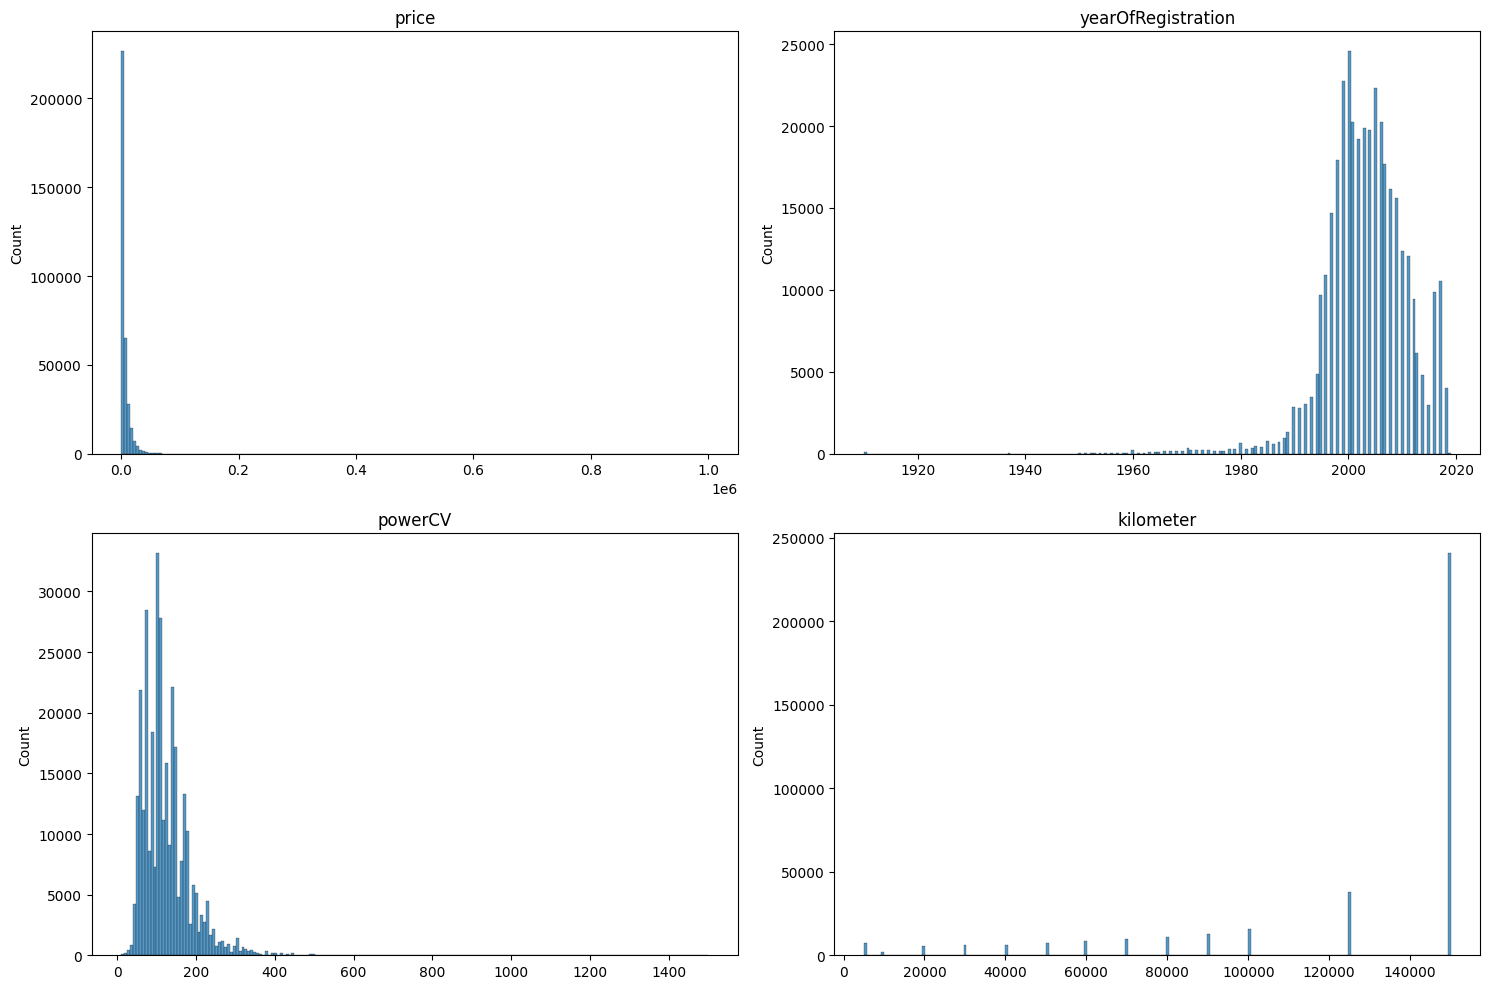

In [145]:
plot_numericas(df, nbins=200)

* Vemos que la mayoría de vehículos se distribuyen en el rango de precios más bajo, pero algunas unidades tienen precios muy altos, que posiblemente sean de lujo.

* En cuanto al año, la mayoría son de los 2000-2010, pero se extiende hacia el presente y lentamente hacia las décadas pasadas.

* En potencia pasa algo parecido al precio, la mayoría se mueven en el rango de 50 a 400 CV.

* En kilómetros vemos que los valores parecen discretos, por lo que puede ser que se correspondan con categorías agrupadas.

In [146]:
# Lo comprobamos
df['kilometer'].unique()

array([150000, 125000,  90000,  40000,  30000,  70000,   5000, 100000,
        60000,  20000,  80000,  50000,  10000])

Efectivamente son categorías pero lo vamos a dejar como numérico ya que medidas como la media o la mediana tienen sentido para nosotros.

---

Para las categóricas seleccionamos, solamente las columnas que nos interesan y que tengan sentido

In [147]:
df_cat.describe().T

,count,unique,top,freq
name,371528,233531,Ford_Fiesta,657
seller,371528,2,private,371525
offerType,371528,2,offer,371516
abtest,371528,2,test,192585
vehicleType,237765,7,small car,80023
gearbox,351319,2,manually,274214
model,351044,251,golf,30070
monthOfRegistration,333853.0,12.0,3.0,36170.0
fuelType,338142,7,petrol,223857
brand,371528,40,volkswagen,79640


In [148]:
df_cat_filtered = df_cat[['seller', 'offerType', 'abtest', 'vehicleType', 'gearbox', 'monthOfRegistration', 'fuelType', 'notRepairedDamage']]

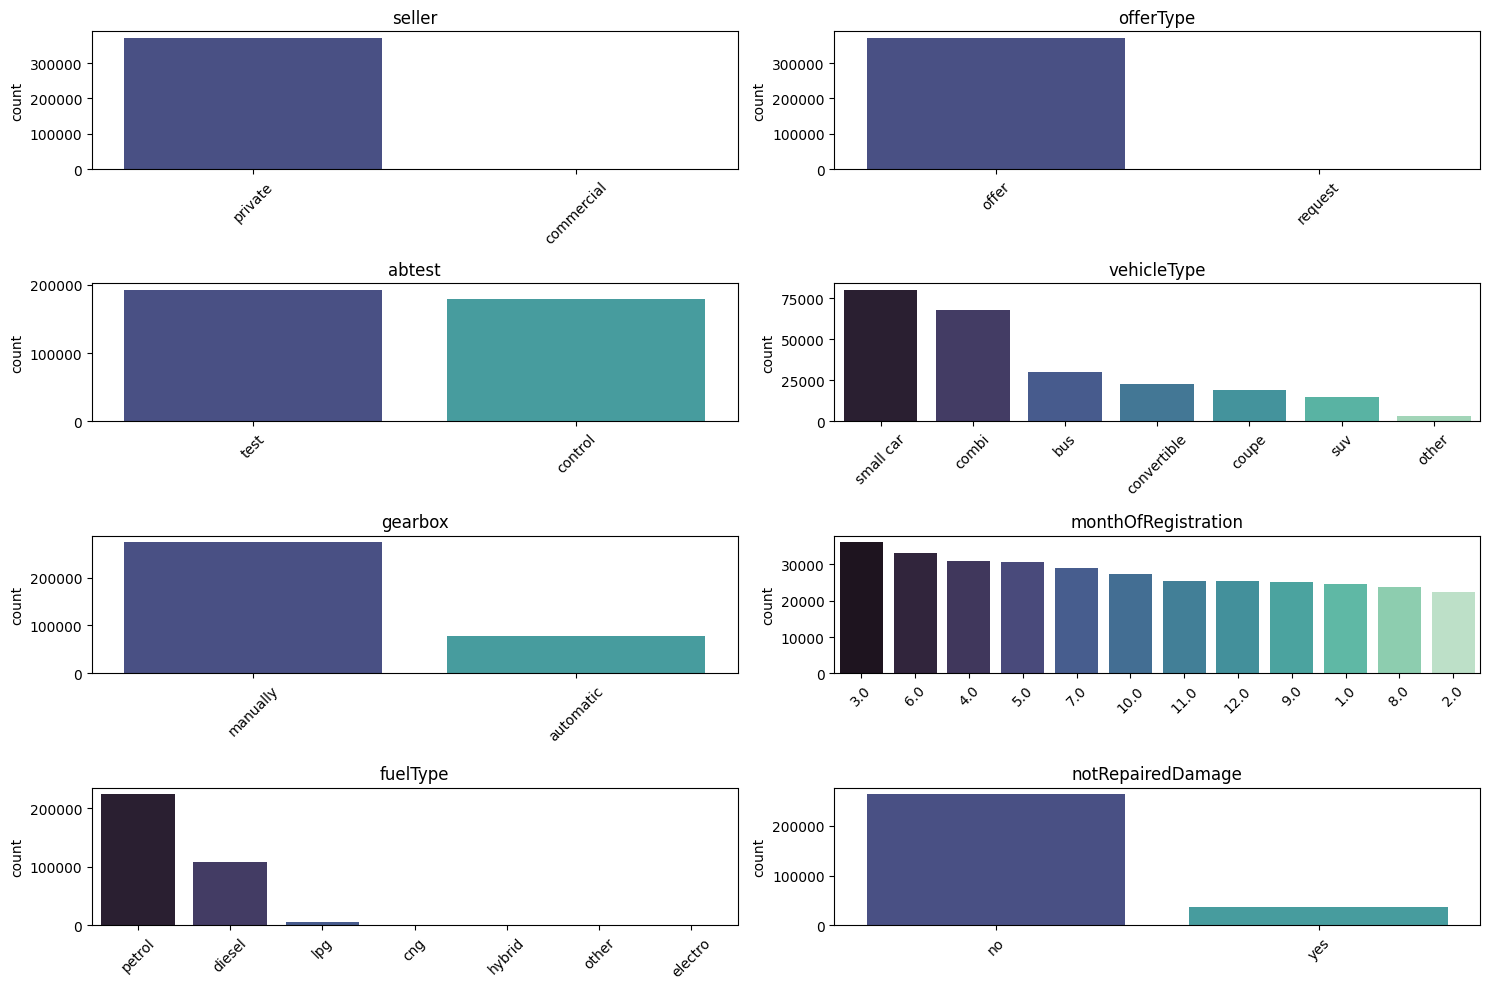

In [149]:
plot_categoricas(df_cat_filtered)

* `Seller`: la grandísima mayoría de vehículos son de particulares, lo cual es razonable en el mercado de segunda mano.

* `offerType`: la mayoría es offer y no request, lo que también tiene sentido ya que las subastas son mucho menos frecuentes.

* `abtest`: el grupo de test es ligeramente más grande, aunque casi iguales. Tiene sentido ya que suele ser conveniente que las muestras sean iguales.

* `vehicleType`: preferencia clara por coches pequeños y combi, seguidos a distancia por buses. Modelos de estilo, como convertibles y coupes, son menos comunes, y los SUVs y vehículos de la categoría "otros" son los menos frecuentes, reflejando una demanda alta de vehículos prácticos y familiares sobre opciones especializadas o de lujo.

* `gearbox`: los manuales dominan sobre los automáticos. Esto tiene sentido ya que los automáticos son más recientes y por lo tanto existen menos en el mercado de segunda mano.

* `monthOfRegistration`: se aprecia una distribución bastante uniforme, aunque con preferencia por algunos meses como marzo, junio, abril y mayo.

* `fuelType`: claramente dominan diesel y gasolina, con preferencia de gasolina.

* `notRepairedDamage`: la mayoría de coches no tienen daños sin reparar, aunque unos pocos sí. Tiene sentido ya que es mucho más sencillo vender un vehículo sin daños, aunque en ocasiones, si no se puede hacer frente a la reparación es frecuente que se recurra a la otra opción.

Vamos a ver por separado las marcas

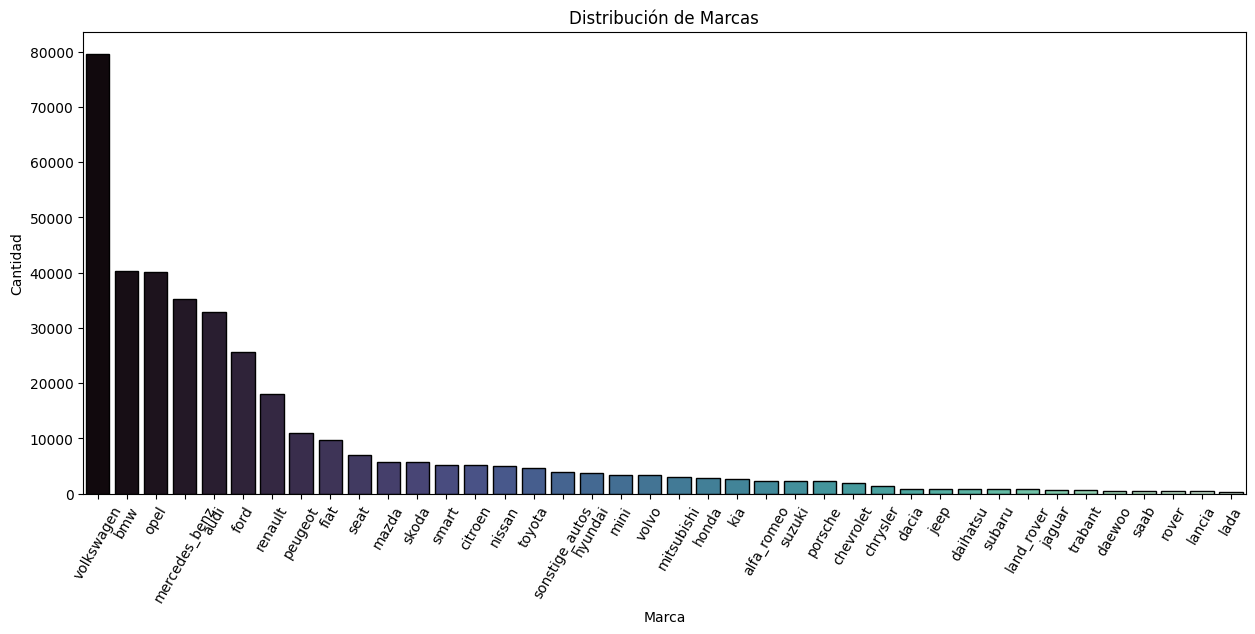

In [150]:
plt.figure(figsize=(15, 6))

# Ordenar las marcas por su frecuencia
order = df['brand'].value_counts().index

# Crear el countplot con una paleta de color
sns.countplot(data=df, x='brand', palette='mako', order=order, edgecolor='black')

# Agregar etiquetas y título
plt.title("Distribución de Marcas")
plt.xlabel("Marca")
plt.ylabel("Cantidad")

# Rotar las etiquetas del eje x si hay muchas categorías
plt.xticks(rotation=60)

# Mostrar el gráfico
plt.show()

Volkswagen domina claramente el mercado seguido por BMW y Opel. El resto de marcas poco a poco disminuyen su presencia.

---

### Relación entre numéricas y categóricas

In [151]:
def relacion_vr_categoricas(df, vr):
    
    df_cat = df.select_dtypes(include = 'O')
    cols_cat = df_cat.columns

    n_plots = len(cols_cat)
    num_filas = math.ceil(n_plots/2)

    fig, axes = plt.subplots(nrows=num_filas, ncols=2, figsize = (15, 10))
    axes = axes.flat

    for i, col in enumerate(cols_cat):

        datos_agrupados = df.groupby(col)[vr].mean().sort_values(ascending=False).reset_index()
        sns.barplot(x = col,
                    y = vr,
                    data = datos_agrupados,
                    ax = axes[i], 
                    palette = 'mako')
        
        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=45)

    # Quitamos el último, si queda vacío
    if n_plots % 2 != 0:
        fig.delaxes(axes[-1])
    plt.tight_layout()
    

In [152]:
df['price'].nunique()

5437

In [153]:
def relacion_vr_numericas(df, vr):
    
    df_num = df.select_dtypes(include = np.number)
    cols_num = df_num.columns

    n_plots = len(cols_num)
    num_filas = math.ceil(n_plots/2)

    fig, axes = plt.subplots(nrows=num_filas, ncols=2, figsize = (15, 10))
    axes = axes.flat

    for i, col in enumerate(cols_num):

        if col == vr:
            fig.delaxes(axes[i])

        else:
            sns.scatterplot(x = col,
                        y = vr,
                        data = df_num,
                        ax = axes[i], 
                        palette = 'mako')
            
            axes[i].set_title(col)
            axes[i].set_xlabel('')

    # Quitamos el último, si queda vacío
    if n_plots % 2 != 0:
        fig.delaxes(axes[-1])
    plt.tight_layout()


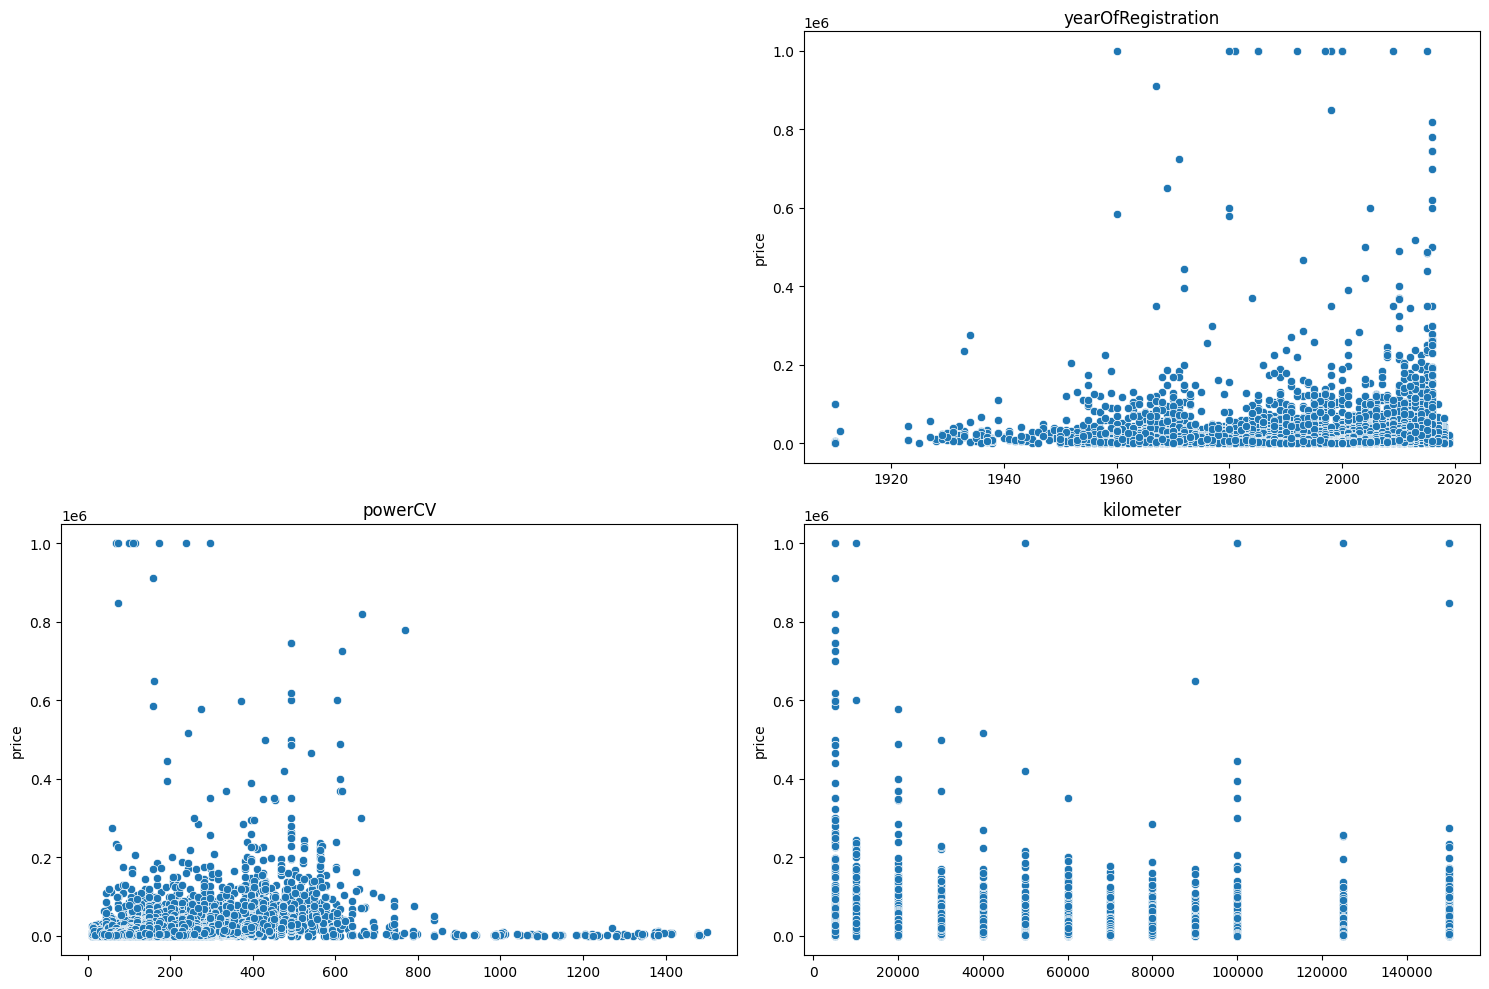

In [154]:
relacion_vr_numericas(df, "price")

No se ve nada en estos gráficos más allá de que los km son una categoría como hemos comentado anteriormente

In [155]:
def plot_matriz_correlacion(df):

    matriz_correlacion = df.corr(numeric_only=True)
    plt.figure(figsize=(5, 5))

    # Máscara para que sea triangular
    mascara = np.triu(np.ones_like(matriz_correlacion, dtype = np.bool_))
    sns.heatmap(matriz_correlacion, 
                annot=True, 
                vmin = -1, 
                vmax = 1, 
                mask=mascara)

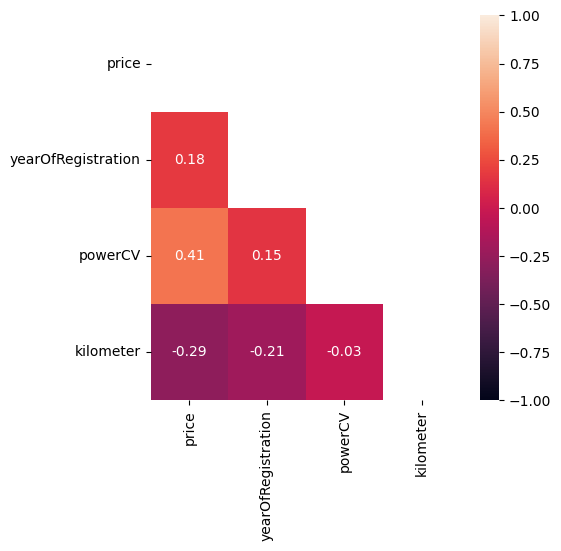

In [156]:
plot_matriz_correlacion(df)

En el mapa de calor sí vemos que hay una correlación moderada entre el precio y la potencia. Tiene sentido ya que vehículos más potentes tienden a ser más costosos, aunque un vehículo más caro puede serlo por otros motivos.

---

### Outliers

In [157]:
def detectar_outliers(df, vr):

    df_num = df.select_dtypes(include = np.number)
    cols_num = df_num.columns

    n_plots = len(cols_num)
    num_filas = math.ceil(n_plots/2)

    # Obtener la paleta de colores
    cmap = plt.cm.get_cmap('mako', n_plots)
    color_list = [cmap(i) for i in range(cmap.N)]

    fig, axes = plt.subplots(nrows=num_filas, ncols=2, figsize = (9, 5))
    axes = axes.flat

    for i, col in enumerate(cols_num):

        sns.boxplot(x = col, 
                    data = df_num,
                    ax = axes[i],
                    color=color_list[i]) 
        
        axes[i].set_title(f'Outliers de {col}')
        axes[i].set_xlabel('')

    # Quitamos el último, si queda vacío
    if n_plots % 2 != 0:
        fig.delaxes(axes[-1])
    plt.tight_layout()


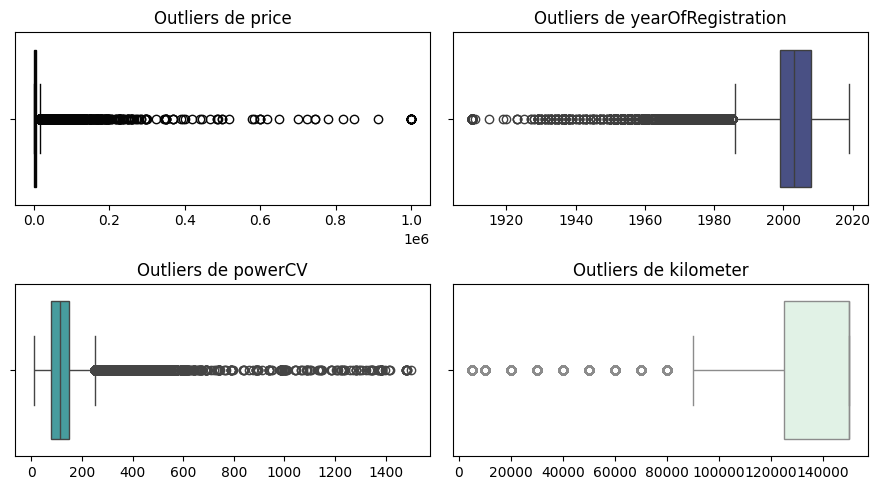

In [158]:
detectar_outliers(df, 'price')

De nuevo apreciamos el carácter discreto de la variable de km. De igual forma se ven las entradas de valores atípicos en cuanto a precio y potencia.

---

### Gestión de nulos

In [159]:
# Imputación de nulos usando métodos estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [ ]:
# Duplicados
df.duplicated().sum()

4

Hay 4 duplicados, nos los cargamos

In [128]:
# Eliminamos duplicados
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df.duplicated().sum()

0

`KNNImputer`

In [164]:
# Buscamos 5 vecinos. Se genera un objeto KNNImputer
imputer_knn = KNNImputer(n_neighbors=2)

# Usamos el método .fit_transform y le pasamos las columnas que queramos que utilice (todas las numéricas)
df_num = df.select_dtypes(include=np.number)
knn_imputado = imputer_knn.fit_transform(df_num)

In [165]:
# Nos devuelve un array que podemos convertir a dataframe
df_num_sin_nulos = pd.DataFrame(knn_imputado, columns=df_num.columns)
df_knn = df.copy()

In [166]:
# Ahora le metemos las columnas que hemos limpiado al df original
df_knn[df_num.columns] = df_num_sin_nulos

In [167]:
# Vemos que hemos imputado los nulos
df_knn.isnull().sum()

dateCrawled                 0
name                        0
seller                      0
offerType                   0
price                       0
abtest                      0
vehicleType            133763
yearOfRegistration          0
gearbox                 20209
powerCV                     0
model                   20484
kilometer                   0
monthOfRegistration     37675
fuelType                33386
brand                       0
notRepairedDamage       72060
dateCreated                 0
postalCode                  0
lastSeen                    0
dtype: int64

In [172]:
df.describe(include=np.number).T.round(2)

,count,mean,std,min,25%,50%,75%,max
price,351464.0,6153.23,12763.30,250.0,1350.0,3200.0,7500.0,1000000.0
yearOfRegistration,371346.0,2003.35,7.78,1910.0,1999.0,2003.0,2008.0,2019.0
powerCV,330287.0,124.70,65.14,10.0,79.0,114.0,148.0,1500.0
kilometer,371528.0,125618.69,40112.34,5000.0,125000.0,150000.0,150000.0,150000.0


In [173]:
df_knn.describe(include=np.number).T.round(2)

,count,mean,std,min,25%,50%,75%,max
price,371528.0,5971.18,12542.36,250.0,1290.0,3000.0,7300.0,1000000.0
yearOfRegistration,371528.0,2003.34,7.80,1910.0,1999.0,2003.0,2008.0,2019.0
powerCV,371528.0,124.81,68.84,10.0,79.0,113.0,148.0,1500.0
kilometer,371528.0,125618.69,40112.34,5000.0,125000.0,150000.0,150000.0,150000.0


Vemos alguna diferencia en los precios mientras que el resto de variables son bastante parecidas

---

`IterativeImputer`

Hay `BayesianRidge`, `RandomForest`, `KNN` (igual al KNN anterior)

In [174]:
# Probamos el otro método
imputer_iterative = IterativeImputer()
iterative_imputado = imputer_iterative.fit_transform(df_num)
df_num_sin_nulos_iterative = pd.DataFrame(iterative_imputado, columns=df_num.columns)
df_iterative = df.copy()
df_iterative[df_num.columns] = df_num_sin_nulos_iterative

In [176]:
df.describe(include=np.number).T.round(2)

,count,mean,std,min,25%,50%,75%,max
price,351464.0,6153.23,12763.30,250.0,1350.0,3200.0,7500.0,1000000.0
yearOfRegistration,371346.0,2003.35,7.78,1910.0,1999.0,2003.0,2008.0,2019.0
powerCV,330287.0,124.70,65.14,10.0,79.0,114.0,148.0,1500.0
kilometer,371528.0,125618.69,40112.34,5000.0,125000.0,150000.0,150000.0,150000.0


In [177]:
df_iterative.describe(include=np.number).T.round(2)

,count,mean,std,min,25%,50%,75%,max
price,371528.0,6055.39,12518.92,-14264.71,1300.0,3200.0,7500.0,1000000.00
yearOfRegistration,371528.0,2003.35,7.78,1910.00,1999.0,2003.0,2008.0,2086.37
powerCV,371528.0,123.92,63.17,-2.90,85.0,114.0,148.0,2651.43
kilometer,371528.0,125618.69,40112.34,5000.00,125000.0,150000.0,150000.0,150000.00


En este caso obtenemos algunos valores negativos por lo que nos quedamos mejor con el método anterior (KNN)